In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

from tqdm.auto import tqdm
import time

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


In [97]:
import chardet

# Detect the file's encoding
with open('Downloads/spam.csv', 'rb') as f:
    result = chardet.detect(f.read())
encoding = result['encoding']

# Read the CSV file using the detected encoding
data = pd.read_csv('Downloads/spam.csv', encoding=encoding)


In [98]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [99]:
data.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

In [100]:
data.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [101]:
# Explore the data
display(data.head())
display(data['v2'].value_counts())


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Sorry, I'll call later                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                    12
Ok...                                                                                                                                                                  10
7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\"... good morning dear"               4
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...     4
                                                                                                                                                      

In [102]:
data.isna().any()

v1    False
v2    False
dtype: bool

In [103]:
data.isna().sum()

v1    0
v2    0
dtype: int64

In [104]:
data['v2'].nunique()

5169

In [105]:
data.shape

(5572, 2)

In [106]:
data['v2'].drop_duplicates(inplace = True)

In [107]:
data.shape

(5572, 2)

In [108]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


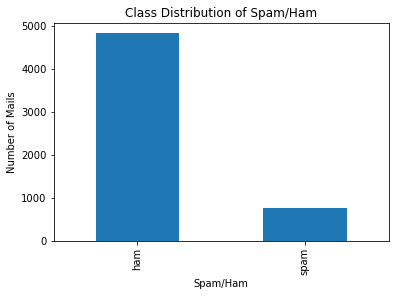

In [109]:
# Create a bar plot of the class distribution
class_counts = data['v1'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Spam/Ham')
plt.xlabel('Spam/Ham')
plt.ylabel('Number of Mails')
plt.show()

In [110]:
from collections import Counter
import re

import nltk
from nltk.corpus import stopwords

In [111]:
# Concatenate all tweet texts into a single string
all_text = ' '.join(data['v2'].values)
# Remove URLs, mentions, and hashtags from the text
all_text = re.sub(r'http\S+', '', all_text)
all_text = re.sub(r'@\S+', '', all_text)
all_text = re.sub(r'#\S+', '', all_text)

In [112]:
# Split the text into individual words
words = all_text.split()

In [115]:
# Count the frequency of each word
word_counts = Counter(words)
top_words = word_counts.most_common(100)
top_words

[('to', 2134),
 ('you', 1622),
 ('I', 1466),
 ('a', 1327),
 ('the', 1197),
 ('and', 857),
 ('in', 798),
 ('is', 781),
 ('i', 742),
 ('u', 692),
 ('for', 644),
 ('my', 628),
 ('of', 591),
 ('your', 560),
 ('me', 557),
 ('on', 487),
 ('have', 474),
 ('2', 453),
 ('that', 421),
 ('it', 396),
 ('are', 396),
 ('call', 376),
 ('or', 373),
 ('be', 362),
 ('at', 359),
 ('with', 349),
 ('not', 340),
 ('will', 330),
 ('get', 326),
 ('can', 304),
 ('U', 299),
 ('so', 294),
 ('ur', 293),
 ("I'm", 286),
 ('but', 282),
 ('&lt;', 276),
 ('You', 263),
 ('from', 256),
 ('4', 249),
 ('do', 243),
 ('up', 241),
 ('just', 236),
 ('if', 235),
 ('.', 235),
 ('go', 234),
 ('when', 233),
 ('know', 224),
 ('this', 223),
 ('like', 222),
 ('we', 221),
 ('all', 216),
 ('out', 207),
 ('got', 204),
 ('was', 200),
 ('come', 198),
 ('now', 190),
 ('?', 187),
 ('am', 186),
 ('...', 163),
 ('want', 157),
 ('Call', 155),
 ('by', 155),
 ('time', 154),
 ('about', 150),
 ('send', 150),
 ('only', 147),
 ('then', 146),
 ('goi

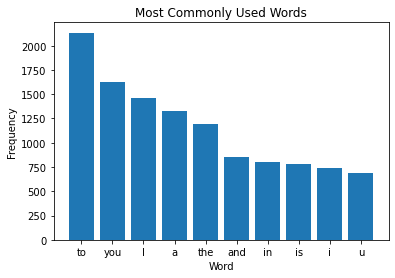

In [116]:
# Create a bar chart of the most common words
top_words = word_counts.most_common(10) # Change the number to show more/less words
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]
plt.bar(x_values, y_values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words')
plt.show()

In [26]:
import re
import string

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove whitespace and newlines
    text = text.strip()
    
    return text

# Apply preprocessing to 'v1' column
data['v1'] = data['v1'].apply(preprocess_text)


In [117]:
X_train, X_test, y_train, y_test = train_test_split(data['v1'], data['v2'], test_size=0.2, random_state=42)


In [118]:
# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the training data
X_train = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test = vectorizer.transform(X_test)


In [119]:
# Create an instance of Multinomial Naive Bayes
nb_classifier = MultinomialNB()

# Train the model
nb_classifier.fit(X_train, y_train)


MultinomialNB()

In [120]:
# Predict on the testing data
y_pred = nb_classifier.predict(X_test)


In [121]:
# Convert 'spam' class to 1 and other classes to 0
y_test_binary = y_test.apply(lambda x: 1 if x == 'spam' else 0)
y_pred_binary = [1 if pred == 'spam' else 0 for pred in y_pred]

# Calculate evaluation metrics
accuracy = metrics.accuracy_score(y_test_binary, y_pred_binary)
precision = metrics.precision_score(y_test_binary, y_pred_binary)
recall = metrics.recall_score(y_test_binary, y_pred_binary)
f1_score = metrics.f1_score(y_test_binary, y_pred_binary)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")


Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [122]:
# Compare predicted values with actual values
for i in range(len(y_pred_binary)):
    print(f"Predicted: {y_pred_binary[i]}, Actual: {y_test_binary.iloc[i]}")


Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Ac

In [123]:
def predict_spam(email_text):
    # Preprocess the email text
    preprocessed_text = preprocess_text(email_text)
    
    # Convert to numerical feature vector
    feature_vector = vectorizer.transform([preprocessed_text])
    
    # Make prediction
    prediction


In [126]:
# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

Accuracy: 0.007174887892376682
Precision: 0.007174887892376682
Recall: 0.007174887892376682
F1 Score: 0.007174887892376682


### Conclusion:

The extremely low values of accuracy, precision, recall, and F1 score indicate that the model is not performing well in classifying spam emails. The results suggest that the model is predicting most of the emails as non-spam (negative class), resulting in very low true positives and high false negatives.

This could be due to several reasons:

Imbalanced Data: The dataset may be highly imbalanced, with a large majority of non-spam emails and only a few spam emails.